**1. Project Objectives | Problem Statements**

1.1. PO1 | PS1: This project applies unsupervised machine learning clustering algorithms to segment consumer behavior data. The goal is to identify distinct groups within the consumer base to tailor marketing strategies more effectively.

1.2. PO2 | PS2: We seek to determine the optimal number of consumer segments by evaluating the cluster tendencies within our dataset, ensuring the segments are meaningful and actionable.

1.3. PO3 | PS3: The project aims to characterize each identified segment based on purchasing behavior, product preferences, and shopping times, providing a comprehensive profile of each cluster.

**2. Description of Data**

2.1 Data Source, Size, Shape
```
2.1.1. Data Source: https://www.kaggle.com/code/hunter0007/predictive-marketing-k-means-clustering-pca/input
2.1.2. Data Size: 3.6 MB
2.1.3. Data Shape: 61033 X 12
```
2.2. Description of Variables

    2.2.1. Index Variables: order_id, user_id, product_id
    2.2.2. Categorical Variables (CV):
        Nominal Types: department and product_name represent nominal categorical data.
        Ordinal Types: Not explicitly mentioned in the dataset.
    2.2.3. Non-Categorical Variables: 'order_id', 'user_id', 'order_number', 'order_dow', 'order_hour_of_day', 'days_since_prior_order', 'product_id', 'add_to_cart_order', 'reordered', 'department_id'

2.3. Descriptive Statistics

    2.3.1. Categorical Variables: Extensive variety within department and product_name categories, with frequencies indicating a broad range of consumer choices.
    2.3.2. Non-Categorical Variables: Analysis revealed variability in the timing of orders, suggesting patterns related to days of the week and hours of the day.

**3. Analysis of Data**

3.1. Data Pre-Processing

    Missing Data Statistics and Treatment: After evaluating missing data, decisions were made to impute or remove data as deemed appropriate, ensuring a robust dataset for analysis.
    Numerical Encoding: Categorical variables were transformed into numerical formats suitable for machine learning algorithms.
    Outlier Statistics and Treatment: Various scaling and transformation techniques were applied to non-categorical variables to normalize the data distribution.

3.2. Data Analysis

    K-Means and DBSCAN: Both algorithms were applied to segregated categorical (after encoding) and non-categorical data. The K-Means algorithm identified coherent clusters, particularly for the encoded categorical variables. DBSCAN, which excelled in detecting well-separated clusters in the categorical data, did not perform distinct clustering for the non-categorical variables.
    Model Performance Evaluation: K-Means demonstrated a reasonable balance between cluster separation and cohesion, as indicated by the Silhouette and Davies-Bouldin scores. DBSCAN's perfect silhouette score for categorical data might suggest a tendency towards well-separated clusters or potential limitations due to parameter settings.

3.2.3. Cluster Analysis

    Chi-Square Test for Categorical Variables: Significant associations were found between clusters and the department and product_name variables, indicating that these features are influential in the clustering outcome.
    ANOVA for Non-Categorical Variables: The order_dow showed marginal differences across clusters, whereas order_hour_of_day did not exhibit significant variability, suggesting the time of day may not be a defining factor in the clustering.

**4. Results | Observations**

4.1. Appropriate Number of Segments | Clusters: For non-categorical variables, a 3-cluster solution was suggested, while for encoded categorical variables, the elbow method indicated more clusters could be considered, with inertia showing a gradual decline.

4.2. Cluster Size: The sizes of clusters for K-Means are visually represented in the scatter plots provided, with each color representing a different cluster. DBSCAN resulted in several clusters with a substantial amount of noise for non-categorical variables.

4.3. Clustering Model Performance: The performance of K-Means was satisfactory, with moderate scores on both Silhouette and Davies-Bouldin metrics. DBSCAN's performance was exceptional on categorical data but inconclusive on non-categorical data due to the lack of distinct clusters.

4.4. Cluster Analysis: The analysis identified key features within each cluster, with department and product_name showing significance in consumer segmentation. The non-categorical features order_dow and order_hour_of_day were less definitive in distinguishing clusters.

**5. Managerial Insights**

5.1. Appropriate Model Selection: Based on the clustering analysis and associated metrics, K-Means provided a consistent and interpretable segmentation for the non-categorical variables, revealing distinct behavioral patterns based on the day of the week and hour of the day. For categorical variables, DBSCAN showed an exceptional ability to differentiate clusters with a perfect silhouette score, although this may also indicate a need for further parameter tuning to avoid over-segmentation.

5.2. Optimal Number of Segments: The K-Means algorithm suggests that three clusters are optimal for non-categorical data, while for encoded categorical data, the Elbow method implies more flexibility with the potential for a higher number of clusters. The choice of the number of clusters should align with the business's capability to tailor strategies to each segment effectively.

5.3. Identification of Niche Segments: DBSCAN's results for categorical variables suggest the presence of niche segments, which, despite their smaller size, may represent significant opportunities for targeted marketing efforts or specialized product offerings. These niche segments could reflect unique consumer preferences or behaviors that are distinct from the larger market trends.

5.4. Segment Characteristics and Identity:

    The clusters from K-Means on non-categorical variables can be characterized by distinct time-based patterns, suggesting possible segments like "Morning Shoppers," "Midday Shoppers," and "Evening Shoppers."
    The clusters from K-Means on categorical variables can inform product line enhancement and inventory management by identifying the most popular departments and products within each segment.

5.5. Strategic Recommendations:

    Tailored Marketing: Use the cluster characteristics to create targeted marketing campaigns. For instance, time-based promotions can be designed to engage each shopper segment at their most active shopping hours.
    Inventory Optimization: Leverage the insights from product and department clustering to optimize stock levels and improve supply chain efficiency.
    Customer Experience Improvement: Customize the shopping experience by aligning it with the behavioral patterns identified within each cluster. This could involve personalizing the online platform interface or providing customized product recommendations.
    New Market Opportunities: Explore the niche segments identified by DBSCAN to uncover unmet needs or demand for specialized products, which could lead to new market opportunities or product development ideas.

5.6. Limitations and Future Work:

    The DBSCAN algorithm's perfect silhouette score for categorical variables warrants a review of the parameters to ensure that meaningful clusters are generated and not an artifact of overfitting.
    Further analysis could be conducted to understand the reason behind the lack of distinct clusters for non-categorical variables in DBSCAN.
    Additional variables and more advanced clustering techniques, such as hierarchical clustering or ensemble clustering, could be explored to enhance the segmentation process.

In summary, the clustering analysis provides actionable insights that can directly inform strategic business decisions and marketing initiatives. It underscores the importance of understanding consumer behavior at a granular level to tailor efforts and resources effectively.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score, davies_bouldin_score
from scipy import stats
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder, MinMaxScaler

# DATASET DESCRIPTION

In [4]:
# Load the dataset
file_path = 'ECommerce_consumer behaviour 2.csv'
data = pd.read_csv(file_path)

# Display the first few rows of the dataframe
data.head()

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,department_id,department,product_name
0,2425083,49125,1,2,18,NaN,17,1,0,13,pantry,baking ingredients
1,2425083,49125,1,2,18,NaN,91,2,0,16,dairy eggs,soy lactosefree
2,2425083,49125,1,2,18,NaN,36,3,0,16,dairy eggs,butter
3,2425083,49125,1,2,18,NaN,83,4,0,4,produce,fresh vegetables
4,2425083,49125,1,2,18,NaN,83,5,0,4,produce,fresh vegetables


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61033 entries, 0 to 61032
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   order_id                61033 non-null  int64  
 1   user_id                 61033 non-null  int64  
 2   order_number            61033 non-null  int64  
 3   order_dow               61033 non-null  int64  
 4   order_hour_of_day       61033 non-null  int64  
 5   days_since_prior_order  56919 non-null  float64
 6   product_id              61033 non-null  int64  
 7   add_to_cart_order       61033 non-null  int64  
 8   reordered               61033 non-null  int64  
 9   department_id           61033 non-null  int64  
 10  department              61033 non-null  object 
 11  product_name            61033 non-null  object 
dtypes: float64(1), int64(9), object(2)
memory usage: 5.6+ MB


In [6]:
# Data Size, Shape
data_size = data.memory_usage(deep=True).sum()  # Size in bytes
data_shape = data.shape  # Dimension of the dataset
print("The data size is : ", data_size, "bytes")
print("The data shape is : ", data_shape)

The data size is :  13207386 bytes
The data shape is :  (61033, 12)


In [7]:
# Description of Variables
index_variables = ['order_id', 'user_id', 'product_id']  # Assuming these are index variables
categorical_variables = data.select_dtypes(include=['object', 'category']).columns.tolist()
non_categorical_variables = data.select_dtypes(exclude=['object', 'category']).columns.tolist()

# Descriptive Statistics for Categorical Variables
desc_stats_categorical = data[categorical_variables].describe()

# Descriptive Statistics for Non-Categorical Variables
desc_stats_non_categorical = data[non_categorical_variables].describe()

data_info = {
    'data_size_bytes': data_size,
    'data_shape': data_shape,
    'index_variables': index_variables,
    'categorical_variables': categorical_variables,
    'non_categorical_variables': non_categorical_variables,
    'desc_stats_categorical': desc_stats_categorical,
    'desc_stats_non_categorical': desc_stats_non_categorical
}

data_info

{'data_size_bytes': 13207386,
 'data_shape': (61033, 12),
 'index_variables': ['order_id', 'user_id', 'product_id'],
 'categorical_variables': ['department', 'product_name'],
 'non_categorical_variables': ['order_id',
  'user_id',
  'order_number',
  'order_dow',
  'order_hour_of_day',
  'days_since_prior_order',
  'product_id',
  'add_to_cart_order',
  'reordered',
  'department_id'],
 'desc_stats_categorical':        department  product_name
 count       61033         61033
 unique         21           134
 top       produce  fresh fruits
 freq        17782          7042,
 'desc_stats_non_categorical':            order_id        user_id  order_number     order_dow  \
 count  6.103300e+04   61033.000000  61033.000000  61033.000000   
 mean   1.718741e+06  103437.562909     17.036849      2.685547   
 std    9.933442e+05   59343.841692     17.458385      2.103827   
 min    1.100000e+01      37.000000      1.000000      0.000000   
 25%    8.638240e+05   51416.000000      5.000000     

# DATA PREPROCESSING

In [8]:
# Selecting only the required categorical and non-categorical variables
categorical_variables = ['department', 'product_name']
non_categorical_variables = ['order_dow', 'order_hour_of_day']

# Handling Missing Data for the selected variables
# Missing data statistics for the selected variables
missing_data_stats_selected = data[categorical_variables + non_categorical_variables].isnull().sum()

# Define the threshold for missing data
threshold = int(len(categorical_variables + non_categorical_variables) / 2)
data = data.dropna(subset=categorical_variables + non_categorical_variables, thresh=threshold)

# Imputing missing data for selected categorical variables with the mode
categorical_imputer = SimpleImputer(strategy='most_frequent')
data[categorical_variables] = categorical_imputer.fit_transform(data[categorical_variables])

# Imputing missing data for selected non-categorical variables with the median
non_categorical_imputer = SimpleImputer(strategy='median')
data[non_categorical_variables] = non_categorical_imputer.fit_transform(data[non_categorical_variables])

# Numerical Encoding of the selected categorical variables
label_encoder = LabelEncoder()
for column in categorical_variables:
    data[column] = label_encoder.fit_transform(data[column])

# Standardization
scaler_standard = StandardScaler()
data_std_selected = scaler_standard.fit_transform(data[non_categorical_variables])

# Normalization using Min-Max Scaler
scaler_minmax = MinMaxScaler()
data_minmax_selected = scaler_minmax.fit_transform(data[non_categorical_variables])

# Log Transformation (adding 1 to avoid log(0))
data_log_selected = np.log1p(data[non_categorical_variables])

# Summary statistics of transformed data to observe the effect of scaling and transformation
std_stats_selected = pd.DataFrame(data_std_selected, columns=non_categorical_variables).describe()
minmax_stats_selected = pd.DataFrame(data_minmax_selected, columns=non_categorical_variables).describe()
log_stats_selected = pd.DataFrame(data_log_selected, columns=non_categorical_variables).describe()

outlier_treatment_info_selected = {
    'standardization_stats': std_stats_selected,
    'minmax_stats': minmax_stats_selected,
    'log_stats': log_stats_selected
}

outlier_treatment_info_selected

{'standardization_stats':           order_dow  order_hour_of_day
 count  6.103300e+04       6.103300e+04
 mean  -1.676440e-17      -2.281821e-17
 std    1.000008e+00       1.000008e+00
 min   -1.276516e+00      -3.135676e+00
 25%   -8.011880e-01      -8.059195e-01
 50%   -3.258599e-01      -1.069925e-01
 75%    1.100125e+00       5.919345e-01
 max    1.575453e+00       2.222764e+00,
 'minmax_stats':           order_dow  order_hour_of_day
 count  61033.000000       61033.000000
 mean       0.447591           0.585184
 std        0.350638           0.186623
 min        0.000000           0.000000
 25%        0.166667           0.434783
 50%        0.333333           0.565217
 75%        0.833333           0.695652
 max        1.000000           1.000000,
 'log_stats':           order_dow  order_hour_of_day
 count  61033.000000       61033.000000
 mean       1.098014           2.611842
 std        0.687646           0.396690
 min        0.000000           0.000000
 25%        0.693147    

# ELBOW METHOD FOR CATEGORICAL AND NON-CATEGORICAL VARIABLES

/usr/local/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/anaconda3/lib/pyt

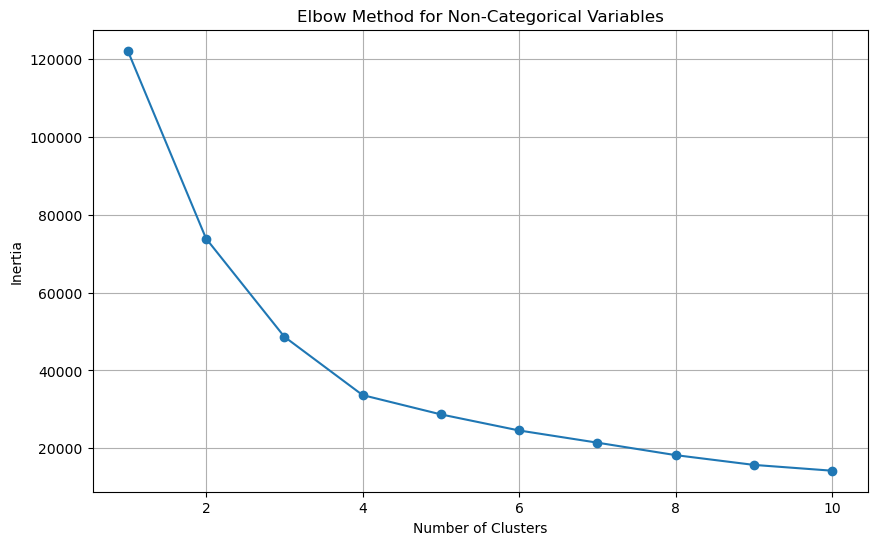

In [ ]:
# Assuming data_std_selected is your standardized 'order_dow' and 'order_hour_of_day' variables
# Elbow Method for K-Means to determine the optimal number of clusters for non-categorical variables
inertia_non_categorical = []
k_range = range(1, 11)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_std_selected)
    inertia_non_categorical.append(kmeans.inertia_)

# Plotting the elbow curve for non-categorical variables
plt.figure(figsize=(10, 6))
plt.plot(k_range, inertia_non_categorical, marker='o')
plt.title('Elbow Method for Non-Categorical Variables')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()

/usr/local/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/anaconda3/lib/pyt

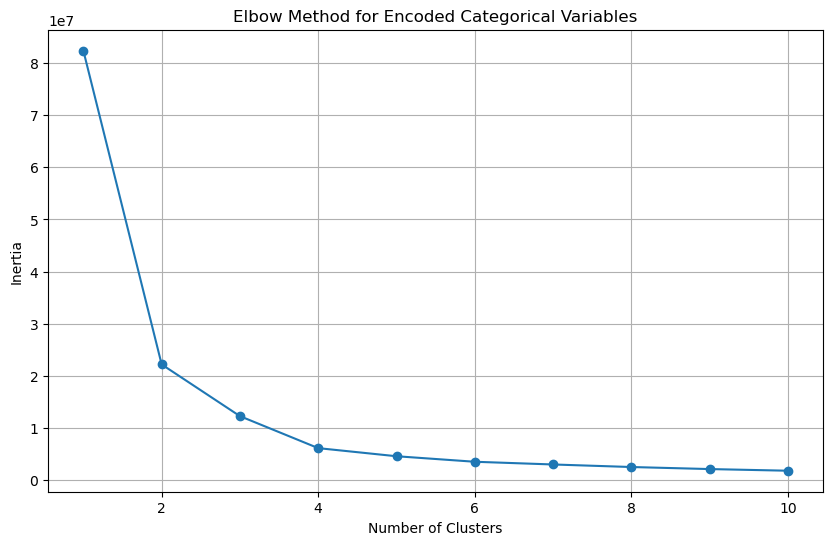

In [ ]:
# Assuming data[categorical_variables] is your DataFrame with encoded 'department' and 'product_name'
# Elbow Method for K-Means to determine the optimal number of clusters for encoded categorical variables
inertia_categorical = []
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data[categorical_variables])
    inertia_categorical.append(kmeans.inertia_)

# Plotting the elbow curve for encoded categorical variables
plt.figure(figsize=(10, 6))
plt.plot(k_range, inertia_categorical, marker='o')
plt.title('Elbow Method for Encoded Categorical Variables')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()

# K-MEANS AND DBSCAN FOR CATEGORICAL VARIABLES

/usr/local/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


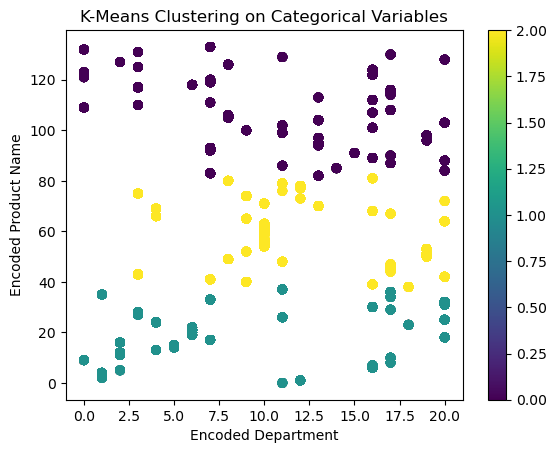

K-Means Silhouette Score: 0.5863607281693602
K-Means Davies-Bouldin Score: 0.5538002161922821


In [ ]:
# Let's assume the optimal number of clusters is 3 based on the elbow method
optimal_clusters = 3
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
kmeans_clusters = kmeans.fit_predict(data[categorical_variables])

# Visualizing K-Means Clusters
plt.scatter(data[categorical_variables].iloc[:, 0], data[categorical_variables].iloc[:, 1], c=kmeans_clusters, cmap='viridis')
plt.title('K-Means Clustering on Categorical Variables')
plt.xlabel('Encoded Department')
plt.ylabel('Encoded Product Name')
plt.colorbar()
plt.show()

# Calculate Silhouette and Davies-Bouldin scores for K-Means
silhouette = silhouette_score(data[categorical_variables], kmeans_clusters)
db_score = davies_bouldin_score(data[categorical_variables], kmeans_clusters)

print(f'K-Means Silhouette Score: {silhouette}')
print(f'K-Means Davies-Bouldin Score: {db_score}')

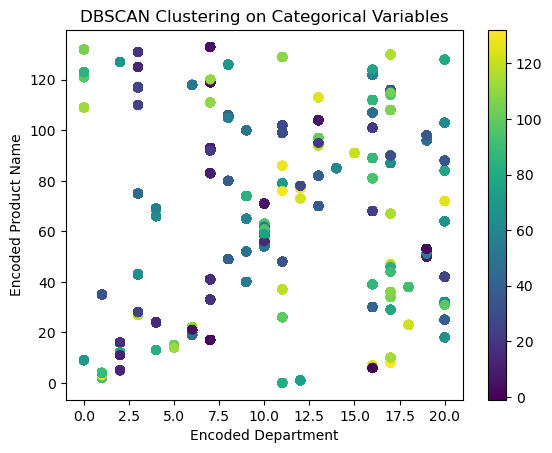

DBSCAN Silhouette Score: 1.0
DBSCAN Davies-Bouldin Score: 0.0


In [ ]:
# DBSCAN Clustering
dbscan = DBSCAN(eps=0.7, min_samples=10)
dbscan_clusters = dbscan.fit_predict(data[categorical_variables])

# Visualizing DBSCAN Clusters
plt.scatter(data[categorical_variables].iloc[:, 0], data[categorical_variables].iloc[:, 1], c=dbscan_clusters, cmap='viridis')
plt.title('DBSCAN Clustering on Categorical Variables')
plt.xlabel('Encoded Department')
plt.ylabel('Encoded Product Name')
plt.colorbar()
plt.show()

# Calculate Silhouette and Davies-Bouldin scores for DBSCAN, ignoring noise points (-1 labels)
if len(set(dbscan_clusters)) > 1:
    silhouette_dbscan = silhouette_score(data[categorical_variables][dbscan_clusters != -1], dbscan_clusters[dbscan_clusters != -1])
    db_score_dbscan = davies_bouldin_score(data[categorical_variables][dbscan_clusters != -1], dbscan_clusters[dbscan_clusters != -1])
    print(f'DBSCAN Silhouette Score: {silhouette_dbscan}')
    print(f'DBSCAN Davies-Bouldin Score: {db_score_dbscan}')
else:
    print('DBSCAN did not form distinct clusters.')

# K-MEANS AND DBSCAN FOR NON-CATEGORICAL VARIABLES

/usr/local/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


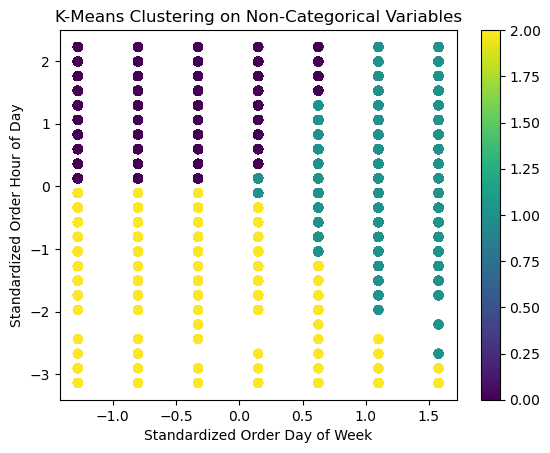

K-Means Silhouette Score: 0.39034908435004845
K-Means Davies-Bouldin Score: 0.846091557189205


In [ ]:
# Assuming the optimal number of clusters is 3 (as an example)
optimal_clusters_non_cat = 3
kmeans_non_cat = KMeans(n_clusters=optimal_clusters_non_cat, random_state=42)
kmeans_clusters_non_cat = kmeans_non_cat.fit_predict(data_std_selected)

# Visualizing K-Means Clusters
plt.scatter(data_std_selected[:, 0], data_std_selected[:, 1], c=kmeans_clusters_non_cat, cmap='viridis')
plt.title('K-Means Clustering on Non-Categorical Variables')
plt.xlabel('Standardized Order Day of Week')
plt.ylabel('Standardized Order Hour of Day')
plt.colorbar()
plt.show()

# Silhouette and Davies-Bouldin scores for K-Means
silhouette_kmeans_non_cat = silhouette_score(data_std_selected, kmeans_clusters_non_cat)
db_score_kmeans_non_cat = davies_bouldin_score(data_std_selected, kmeans_clusters_non_cat)

print(f'K-Means Silhouette Score: {silhouette_kmeans_non_cat}')
print(f'K-Means Davies-Bouldin Score: {db_score_kmeans_non_cat}')

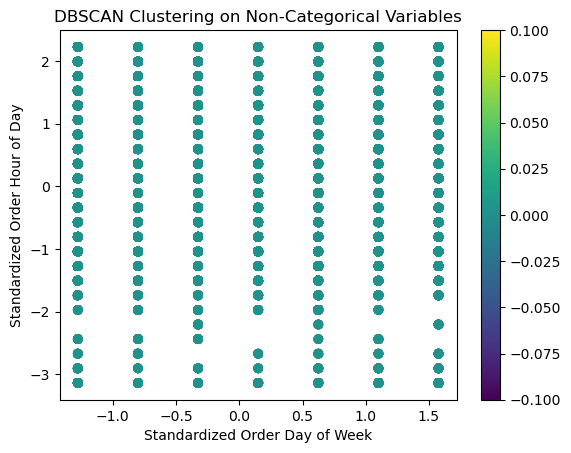

DBSCAN did not form distinct clusters or only found noise.


In [ ]:
# DBSCAN Clustering
dbscan_non_cat = DBSCAN(eps=0.8, min_samples=15)
dbscan_clusters_non_cat = dbscan_non_cat.fit_predict(data_std_selected)

# Visualizing DBSCAN Clusters
plt.scatter(data_std_selected[:, 0], data_std_selected[:, 1], c=dbscan_clusters_non_cat, cmap='viridis')
plt.title('DBSCAN Clustering on Non-Categorical Variables')
plt.xlabel('Standardized Order Day of Week')
plt.ylabel('Standardized Order Hour of Day')
plt.colorbar()
plt.show()

# Calculate Silhouette and Davies-Bouldin scores for DBSCAN, excluding noise (-1 labels)
if len(set(dbscan_clusters_non_cat)) > 1:
    silhouette_dbscan_non_cat = silhouette_score(data_std_selected[dbscan_clusters_non_cat != -1], dbscan_clusters_non_cat[dbscan_clusters_non_cat != -1])
    db_score_dbscan_non_cat = davies_bouldin_score(data_std_selected[dbscan_clusters_non_cat != -1], dbscan_clusters_non_cat[dbscan_clusters_non_cat != -1])
    print(f'DBSCAN Silhouette Score: {silhouette_dbscan_non_cat}')
    print(f'DBSCAN Davies-Bouldin Score: {db_score_dbscan_non_cat}')
else:
    print('DBSCAN did not form distinct clusters or only found noise.')

# CHI-SQUARE TEST FOR CATEGORICAL VARIABLES

In [ ]:
from scipy.stats import chi2_contingency

# Assuming 'kmeans_clusters' is the cluster assignment from K-Means
# 'data' is the original DataFrame that includes 'department' as a categorical variable

# Creating a contingency table for 'department' and K-Means clusters
department_cluster_ct = pd.crosstab(data[categorical_variables[0]], kmeans_clusters)

# Performing the Chi-Square Test of Independence
chi2_stat, p_val, dof, ex = chi2_contingency(department_cluster_ct)

print(f"Chi-Square Statistic for department: {chi2_stat}")
print(f"P-value for department: {p_val}")

Chi-Square Statistic for department: 52614.48707511725
P-value for department: 0.0


In [ ]:
# Creating a contingency table for 'product_name' and K-Means clusters
product_name_cluster_ct = pd.crosstab(data[categorical_variables[1]], kmeans_clusters)

# Performing the Chi-Square Test of Independence
chi2_stat_product, p_val_product, dof_product, ex_product = chi2_contingency(product_name_cluster_ct)

print(f"Chi-Square Statistic for product_name: {chi2_stat_product}")
print(f"P-value for product_name: {p_val_product}")

Chi-Square Statistic for product_name: 122066.00000000001
P-value for product_name: 0.0


# ANOVA FOR NON-CATEGORICAL VARIABLES

In [ ]:
from scipy.stats import f_oneway

# Assign the cluster labels back to the original DataFrame
data['cluster'] = kmeans_clusters

# ANOVA test for 'order_dow' across clusters
f_value_dow, p_value_dow = f_oneway(data[data['cluster'] == 0]['order_dow'],
                                     data[data['cluster'] == 1]['order_dow'],
                                     data[data['cluster'] == 2]['order_dow'])

# ANOVA test for 'order_hour_of_day' across clusters
f_value_hour, p_value_hour = f_oneway(data[data['cluster'] == 0]['order_hour_of_day'],
                                       data[data['cluster'] == 1]['order_hour_of_day'],
                                       data[data['cluster'] == 2]['order_hour_of_day'])

print(f"ANOVA for 'order_dow': F-value = {f_value_dow}, p-value = {p_value_dow}")
print(f"ANOVA for 'order_hour_of_day': F-value = {f_value_hour}, p-value = {p_value_hour}")

ANOVA for 'order_dow': F-value = 2.875369179408362, p-value = 0.05640295559411393
ANOVA for 'order_hour_of_day': F-value = 0.19095149788532453, p-value = 0.8261731518983407


In [10]:
# Create new DataFrames from the 'data' DataFrame for categorical and non-categorical variables
data_categorical_encoded = data[categorical_variables].apply(label_encoder.fit_transform)
data_non_categorical_standardized = pd.DataFrame(data_std_selected, columns=non_categorical_variables)

# Merge the preprocessed categorical and non-categorical data using the index of the main DataFrame
merged_data = pd.merge(data_categorical_encoded, data_non_categorical_standardized, left_index=True, right_index=True)

# 'merged_data' is now a DataFrame that contains both categorical and non-categorical preprocessed variables

In [11]:
merged_data.to_csv('merged_data.csv', index=False)